In [ ]:
# first of all we import all imp Libraries from python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
# Now we copy the path of the dataset from the sourcecode

In [ ]:
df=pd.read_csv("/content/ds_salaries.csv")

In [ ]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


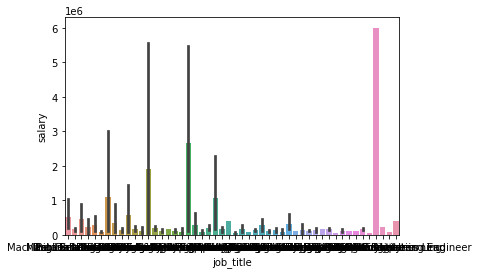

In [ ]:
sns.barplot(x="job_title",y="salary",data=df)

In [2]:
# Now we remove unwanted Outliers from the dataset with drop() function

In [ ]:
df.drop(["work_year","experience_level","employment_type","job_title"],axis=1,inplace=True)

In [ ]:
df

,Unnamed: 0,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,70000,EUR,79833,DE,0,DE,L
1,1,260000,USD,260000,JP,0,JP,S
2,2,85000,GBP,109024,GB,50,GB,M
3,3,20000,USD,20000,HN,0,HN,S
4,4,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...
602,602,154000,USD,154000,US,100,US,M
603,603,126000,USD,126000,US,100,US,M
604,604,129000,USD,129000,US,0,US,M
605,605,150000,USD,150000,US,100,US,M


In [ ]:
df.drop(["employee_residence","company_location","salary_in_usd"],inplace=True,axis=1)

In [ ]:
df

,Unnamed: 0,salary,salary_currency,remote_ratio,company_size
0,0,70000,EUR,0,L
1,1,260000,USD,0,S
2,2,85000,GBP,50,M
3,3,20000,USD,0,S
4,4,150000,USD,50,L
...,...,...,...,...,...
602,602,154000,USD,100,M
603,603,126000,USD,100,M
604,604,129000,USD,0,M
605,605,150000,USD,100,M


In [ ]:
# Now we use LabelEncoder to convert Categorical format into numerical format from dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
salary_currency=LabelEncoder()

In [ ]:
company_size=LabelEncoder()

In [ ]:
df["salary_currency"]=salary_currency.fit_transform(df["salary_currency"])
df["company_size"]=company_size.fit_transform(df["company_size"])

In [ ]:
df

,Unnamed: 0,salary,salary_currency,remote_ratio,company_size
0,0,70000,7,0,0
1,1,260000,16,0,2
2,2,85000,8,50,1
3,3,20000,16,0,2
4,4,150000,16,50,0
...,...,...,...,...,...
602,602,154000,16,100,1
603,603,126000,16,100,1
604,604,129000,16,0,1
605,605,150000,16,100,1


In [4]:
# Now we seperate out features (x) and Label(y) from the dataset using iloc()function

In [ ]:
x=df.iloc[:,2:5]

In [ ]:
x

,salary_currency,remote_ratio,company_size
0,7,0,0
1,16,0,2
2,8,50,1
3,16,0,2
4,16,50,0
...,...,...,...
602,16,100,1
603,16,100,1
604,16,0,1
605,16,100,1


In [ ]:
y=df.iloc[:,1]

In [ ]:
y

0       70000
1      260000
2       85000
3       20000
4      150000
        ...  
602    154000
603    126000
604    129000
605    150000
606    200000
Name: salary, Length: 607, dtype: int64

In [5]:
# Now we use Sciket_learn algorithm to train and test the model 

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=(train_test_split(x,y,test_size=0.2))

In [ ]:
len(x_train)

485

In [ ]:
len(x_test)

122

In [ ]:
# Now we use StandardScaler process to range the data between 0 and 1

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
sc.fit_transform(x_train)

array([[ 0.69681189, -0.50325178,  1.82438655],
       [ 0.69681189,  0.72946092,  0.29882193],
       [ 0.69681189, -1.73596449,  0.29882193],
       ...,
       [ 0.69681189,  0.72946092,  1.82438655],
       [ 0.69681189, -1.73596449, -1.22674268],
       [ 0.69681189,  0.72946092,  0.29882193]])

In [ ]:
sc.fit_transform(x_test)

array([[ 0.60948805,  0.65868395, -1.29665673],
       [ 0.60948805,  0.65868395, -1.29665673],
       [ 0.60948805, -1.77645064, -1.29665673],
       [-1.26704297,  0.65868395,  0.25424642],
       [ 0.60948805,  0.65868395, -1.29665673],
       [ 0.60948805,  0.65868395,  1.80514957],
       [ 0.60948805,  0.65868395,  0.25424642],
       [-0.79791022,  0.65868395,  1.80514957],
       [ 0.60948805, -1.77645064,  0.25424642],
       [ 0.60948805,  0.65868395, -1.29665673],
       [ 0.60948805,  0.65868395, -1.29665673],
       [-0.79791022, -0.55888335,  0.25424642],
       [ 0.60948805,  0.65868395,  0.25424642],
       [ 0.60948805, -1.77645064,  0.25424642],
       [-1.50160935,  0.65868395,  0.25424642],
       [ 0.60948805,  0.65868395, -1.29665673],
       [ 0.60948805,  0.65868395, -1.29665673],
       [ 0.60948805,  0.65868395,  0.25424642],
       [-1.26704297, -1.77645064,  0.25424642],
       [ 0.60948805,  0.65868395,  0.25424642],
       [ 0.60948805,  0.65868395,  1.805

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model=DecisionTreeRegressor()

In [ ]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
model.score(x_test,y_test)

0.9504190323201868

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([  167221.81818182,   167221.81818182,   156788.23529412,
          55277.77777778,   167221.81818182,   106438.        ,
         141291.13013699,   877500.        ,   129010.65      ,
         167221.81818182,   167221.81818182,   411500.        ,
         141291.13013699,   129010.65      ,    66971.42857143,
         167221.81818182,   167221.81818182,   141291.13013699,
          69166.66666667,   141291.13013699,   106438.        ,
         167221.81818182,   156788.23529412,   167221.81818182,
         141291.13013699,    69166.66666667,   129010.65      ,
         145399.93333333,   141291.13013699,   141291.13013699,
          56913.33333333,   141291.13013699,    47511.        ,
         167221.81818182,    56913.33333333,    69166.66666667,
          55277.77777778,   141291.13013699,    59392.66666667,
          69166.66666667,   129010.65      ,   141291.13013699,
         129010.65      ,   167221.81818182,   106438.        ,
         167221.81818182,   141291.13013

In [6]:
# Now we calculate the mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse=mean_squared_error(y_test,y_pred)

In [ ]:
mse # Mean Squared Error

51290891970.276955

In [ ]:
# Now we calculate Root mean squared error (rmse)

In [ ]:
rmse=np.sqrt(mse)

In [ ]:
rmse

226474.92569879995

In [ ]:
# Now we are plotting the chart

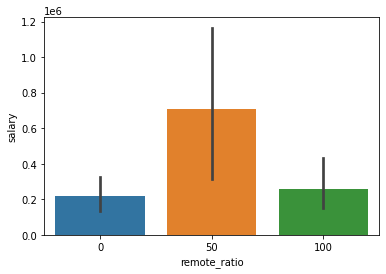

In [ ]:
sns.barplot(x="remote_ratio",y="salary",data=df)